In [6]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
%matplotlib inline


In [16]:
import sys
sys.path.append('/home/courtney/voxelmorph/src')

import nibabel as nib
from neuron.plot import slices
from pynd.segutils import seg_overlay, seg_overlap
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
sys.path.append('../ext/medipy-lib')
from medipy.metrics import dice

from visualize import visualize_seg_contour, visualize_seg

In [25]:
good_labels = sio.loadmat('../data/labels.mat')['labels'][0]
idx_map = {}
for i in range(len(good_labels)):
    idx_map[good_labels[i]] = i

regions = ['Brain-Stem', 'Thalamus', 'Cerebellum-Cortex', 'Cerebral-W.Matter', 'Cerebellum-W.Matter', 'Putamen', 'VentralDC', 'Palladium', 'Caudate', 'Lateral-Ventricle', 'Hippocampus', '3rd-Ventricle', '4th-Ventricle', 'Amygdala', 'Cerebral-Cortex', 'CSF', 'choroid-plexus']
reg_to_num_list = {'Brain-Stem': [16],
                   'Thalamus': [10, 46],
                   'Cerebellum-Cortex': [8, 47],
                   'Cerebral-W.Matter': [2, 41],
                   'Cerebellum-W.Matter': [7, 46],
                   'Putamen': [12, 51],
                   'VentralDC': [28, 60],
                   'Palladium': [13, 52],
                   'Caudate': [11, 50],
                   'Lateral-Ventricle': [4, 43],
                   'Hippocampus': [17, 53],
                   '3rd-Ventricle': [14],
                   '4th-Ventricle': [15],
                   'Amygdala': [18, 54],
                   'Cerebral-Cortex': [3, 42],
                   'CSF': [24],
                   'choroid-plexus': [31, 63]}


[ 2  3  4  7  8 10 11 12 13 14 15 16 17 18 24 28 31 41 42 43 46 47 49 50
 51 52 53 54 60 63]


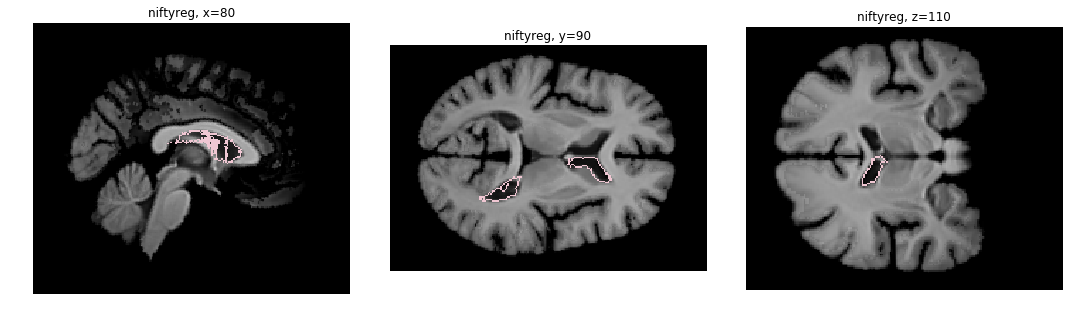

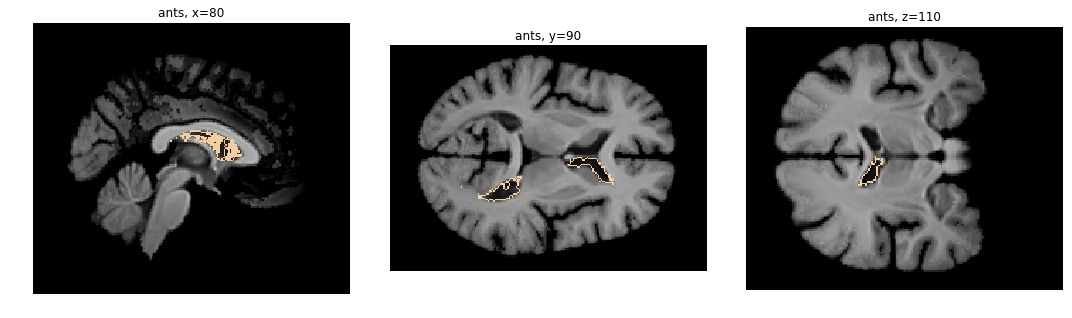

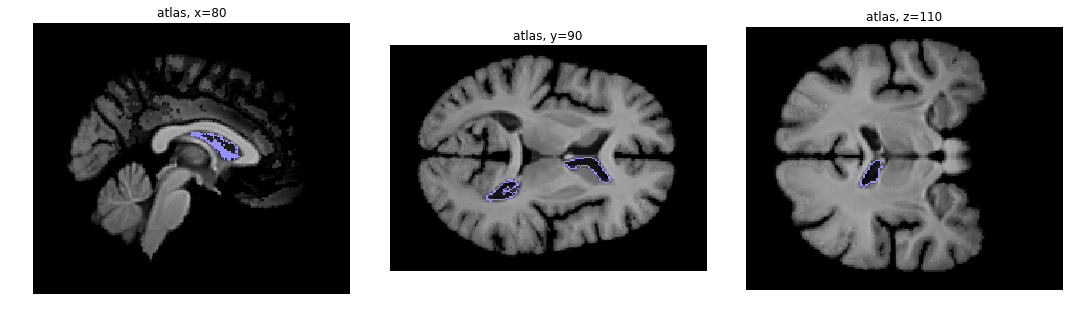

In [31]:
nifty_warped = nib.load("../test_niftyreg.nii").get_data()
atlas = nib.load("../t1_atlas.nii").get_data()
atlas_seg = nib.load("../t1_atlas_seg.nii").get_data()
original = nib.load("../t2_atlas_n_027_S_2219.nii").get_data()
original_seg = nib.load("../data/t2_atlas_seg_027_S_2219.nii").get_data()
ants_warped = nib.load("../test_ants.nii.gz").get_data()
nifty_seg = nib.load('../test_niftyreg_seg.nii').get_data()
ants_seg = nib.load('../test_ants_seg_0.nii').get_data()

# slices([atlas[80,:,:], atlas[:,90,:], atlas[:,:,100]])
# slices([old[80,:,:], old[:,90,:], old[:,:,100]])
# slices([img[80,:,:], img[:,90,:], img[:,:,100]])
# slices([original[80,:,:], original[:,90,:], original[:,:,100]])
# print(np.shape(atlas))
visualize_seg_contour(atlas, nifty_seg, title='niftyreg')
visualize_seg_contour(atlas, ants_seg, title='ants')
visualize_seg_contour(atlas, atlas_seg, title='atlas')



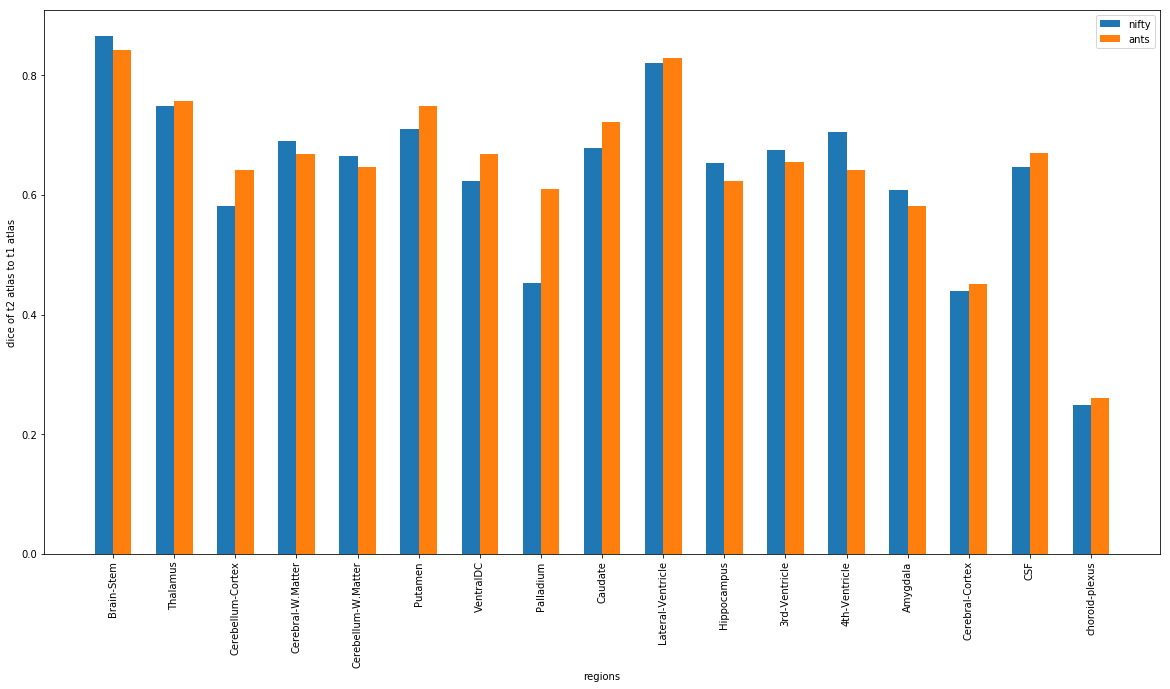

In [27]:
plt.figure(figsize=(20,10))
nifty_dice, _ = dice(atlas_seg, nifty_seg, labels=good_labels, nargout=2)
ants_dice, _ = dice(atlas_seg, ants_seg, labels=good_labels, nargout=2)

inds = np.arange(len(regions))
nifty_dice_ordered = []
ants_dice_ordered = []
for region in regions:
    nifty_sum = 0
    ants_sum = 0
    for num in reg_to_num_list[region]:
        nifty_sum += nifty_dice[idx_map[num]]
        ants_sum += ants_dice[idx_map[num]]
    nifty_dice_ordered.append(nifty_sum/len(reg_to_num_list[region]))
    ants_dice_ordered.append(ants_sum/len(reg_to_num_list[region]))

plt.bar(inds, nifty_dice_ordered, 0.3, label='nifty')
plt.bar(inds+0.3, ants_dice_ordered, 0.3, label='ants')
plt.legend()
plt.ylabel('dice of t2 atlas to t1 atlas')
plt.xlabel('regions')
plt.xticks(inds+0.15, regions, rotation='vertical')
plt.show()

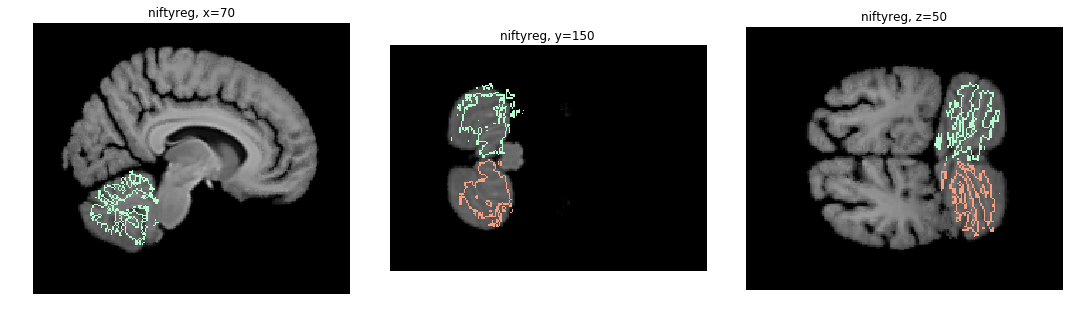

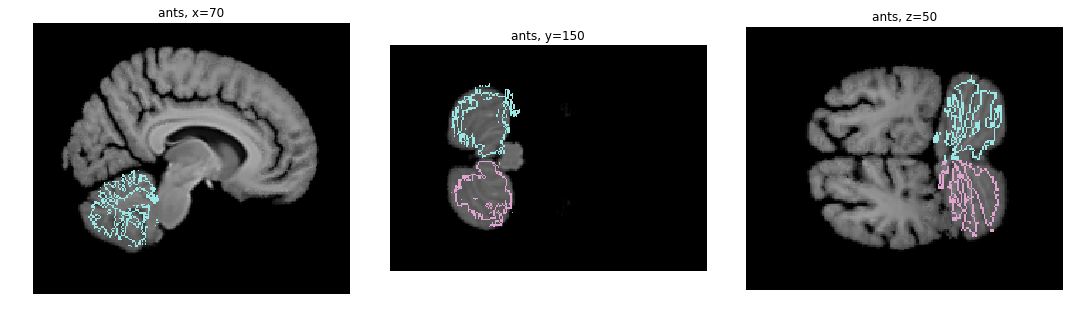

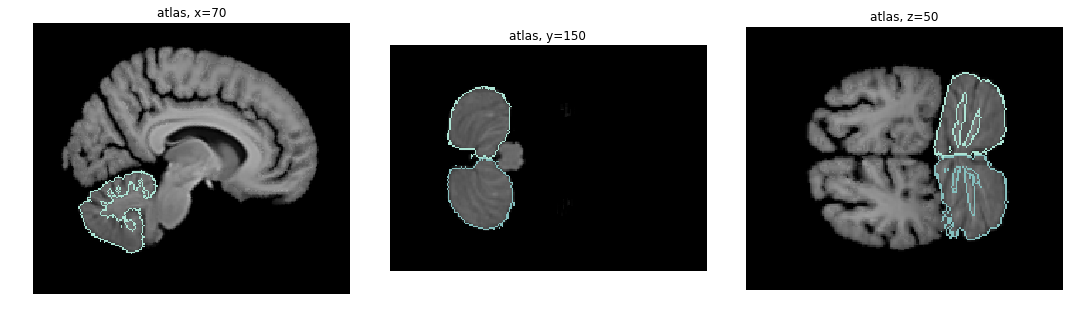

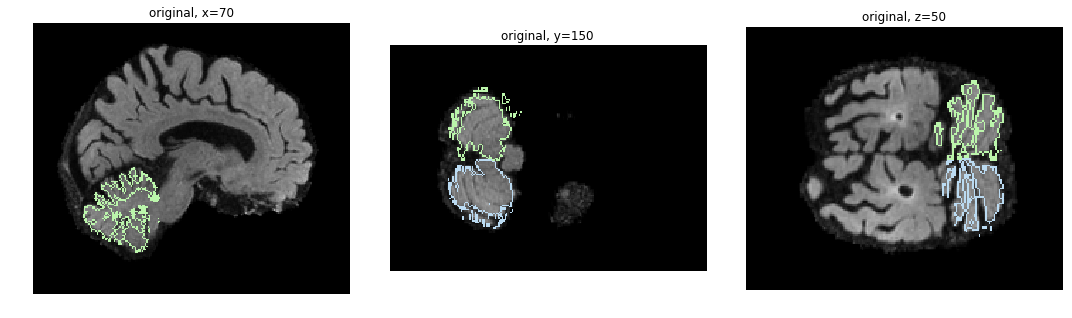

In [37]:
visualize_seg_contour(atlas, nifty_seg, title='niftyreg', region_numbers=reg_to_num_list['Cerebellum-Cortex'], slice_idx=[70, 150, 50])
visualize_seg_contour(atlas, ants_seg, title='ants', region_numbers=reg_to_num_list['Cerebellum-Cortex'], slice_idx=[70, 150, 50])
visualize_seg_contour(atlas, atlas_seg, title='atlas', region_numbers=reg_to_num_list['Cerebellum-Cortex'], slice_idx=[70, 150, 50])
visualize_seg_contour(original, original_seg, title='original', region_numbers=reg_to_num_list['Cerebellum-Cortex'], slice_idx=[70, 150, 50])

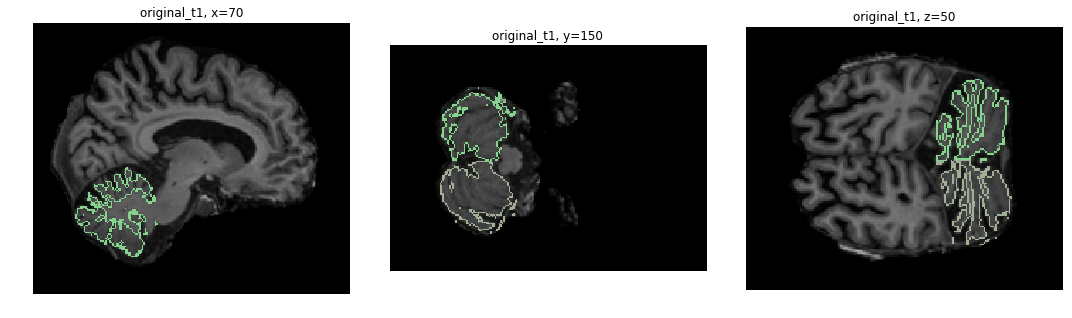

In [38]:
original_t1 = nib.load("../images/t1_027_S_2219_470399.nii").get_data()
original_t1_seg = nib.load("../images/t1_027_S_2219_470399_seg.nii").get_data()
visualize_seg_contour(original_t1, original_t1_seg, title='original_t1', region_numbers=reg_to_num_list['Cerebellum-Cortex'], slice_idx=[70, 150, 50])

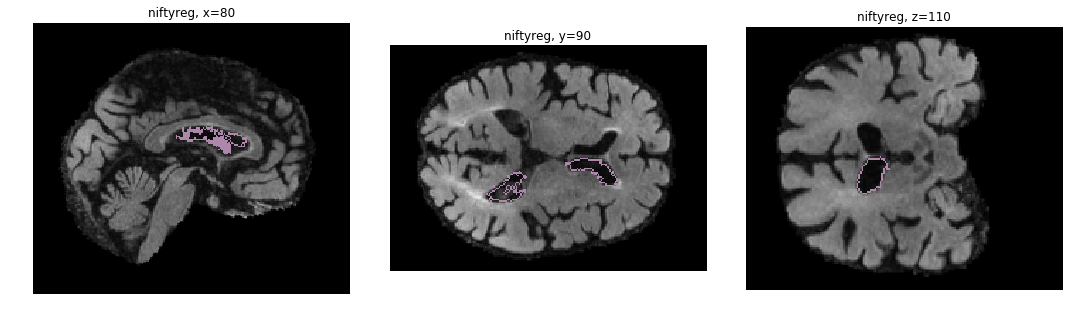

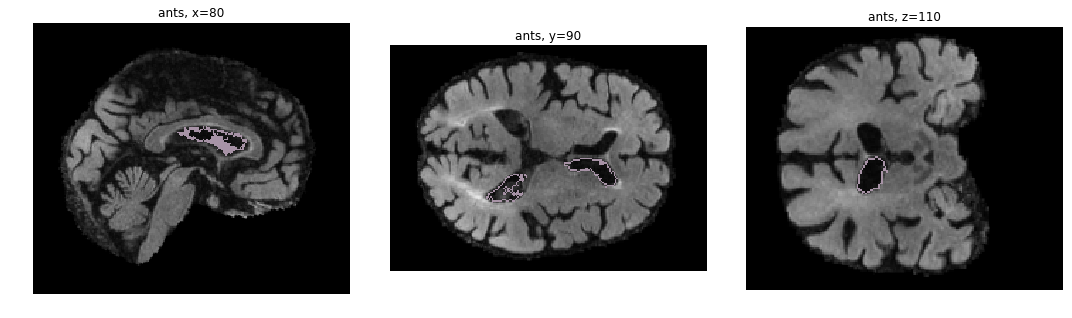

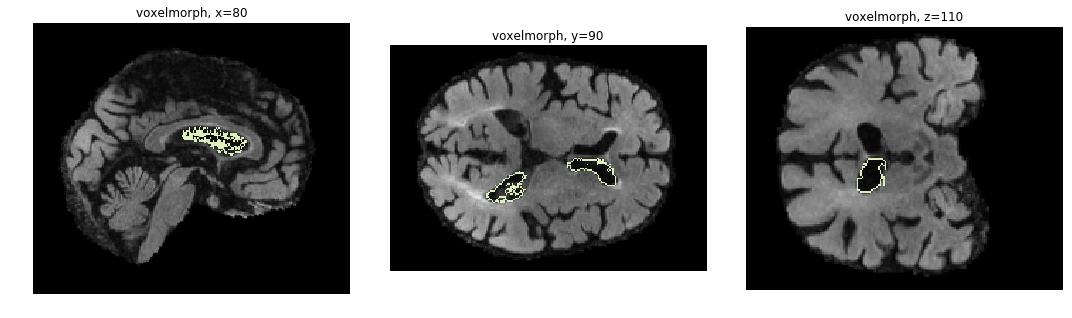

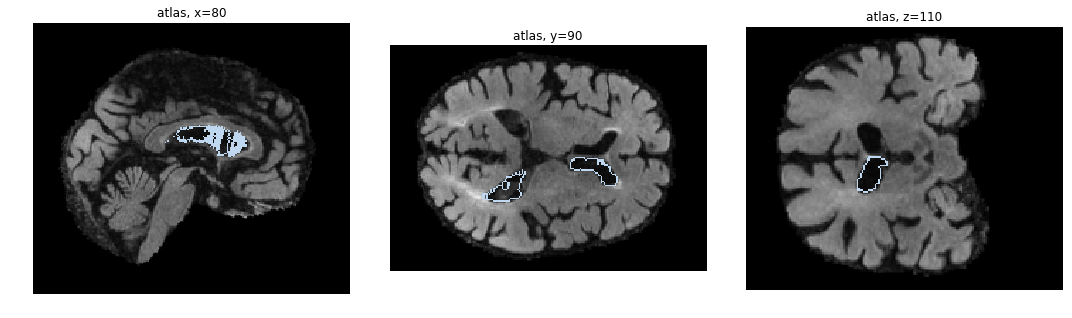

In [52]:
original = nib.load("../t1_atlas.nii").get_data()
original_seg = nib.load("../t1_atlas_seg.nii").get_data()
atlas = nib.load("../t2_atlas_n_027_S_2219.nii").get_data()
atlas_seg = nib.load("../data/t2_atlas_seg_027_S_2219.nii").get_data()
ants_warped = nib.load("../test_ants_t1tot2.nii.gz").get_data()
nifty_warped = nib.load("../test_niftyreg_t1tot2.nii").get_data()
nifty_seg = nib.load('../test_niftyreg_t1tot2_seg.nii').get_data()
ants_seg = nib.load('../test_ants_t1tot2_seg.nii').get_data()
vm_warped = nib.load("../test_voxelmorph_t1tot2.nii").get_data()
vm_seg = nib.load('../test_voxelmorph_t1tot2_seg.nii').get_data()

# slices([atlas[80,:,:], atlas[:,90,:], atlas[:,:,100]])
# slices([old[80,:,:], old[:,90,:], old[:,:,100]])
# slices([img[80,:,:], img[:,90,:], img[:,:,100]])
# slices([original[80,:,:], original[:,90,:], original[:,:,100]])
# print(np.shape(atlas))
visualize_seg_contour(atlas, nifty_seg, title='niftyreg')
visualize_seg_contour(atlas, ants_seg, title='ants')
visualize_seg_contour(atlas, vm_seg, title='voxelmorph')
visualize_seg_contour(atlas, atlas_seg, title='atlas')

nifty dice 0.6242017828838189
ants dice 0.6402834106439894
vm dice 0.6942060355272022


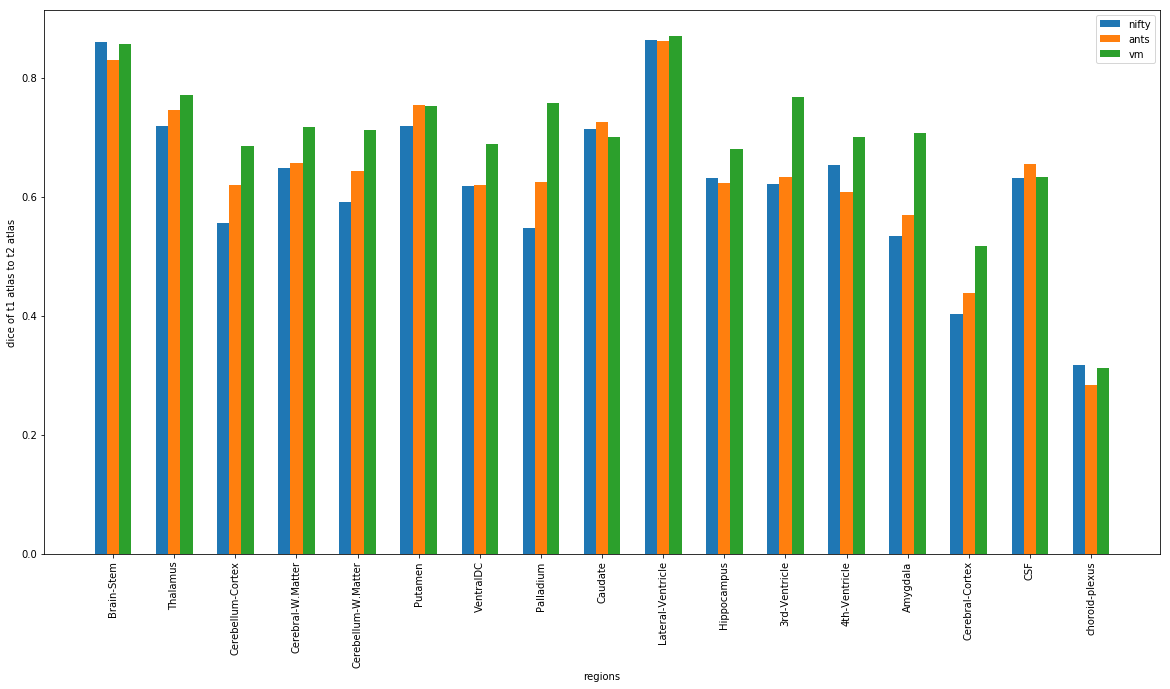

In [53]:
plt.figure(figsize=(20,10))
nifty_dice, _ = dice(atlas_seg, nifty_seg, labels=good_labels, nargout=2)
ants_dice, _ = dice(atlas_seg, ants_seg, labels=good_labels, nargout=2)
vm_dice, _ = dice(atlas_seg, vm_seg, labels=good_labels, nargout=2)

print('nifty dice', np.mean(nifty_dice))
print('ants dice', np.mean(ants_dice))
print('vm dice', np.mean(vm_dice))

inds = np.arange(len(regions))
nifty_dice_ordered = []
ants_dice_ordered = []
vm_dice_ordered = []

for region in regions:
    nifty_sum = 0
    ants_sum = 0
    vm_sum = 0
    for num in reg_to_num_list[region]:
        nifty_sum += nifty_dice[idx_map[num]]
        ants_sum += ants_dice[idx_map[num]]
        vm_sum += vm_dice[idx_map[num]]

    nifty_dice_ordered.append(nifty_sum/len(reg_to_num_list[region]))
    ants_dice_ordered.append(ants_sum/len(reg_to_num_list[region]))
    vm_dice_ordered.append(vm_sum/len(reg_to_num_list[region]))

plt.bar(inds, nifty_dice_ordered, 0.2, label='nifty')
plt.bar(inds+0.2, ants_dice_ordered, 0.2, label='ants')
plt.bar(inds+0.4, vm_dice_ordered, 0.2, label='vm')

plt.legend()
plt.ylabel('dice of t1 atlas to t2 atlas')
plt.xlabel('regions')
plt.xticks(inds+0.2, regions, rotation='vertical')
plt.show()

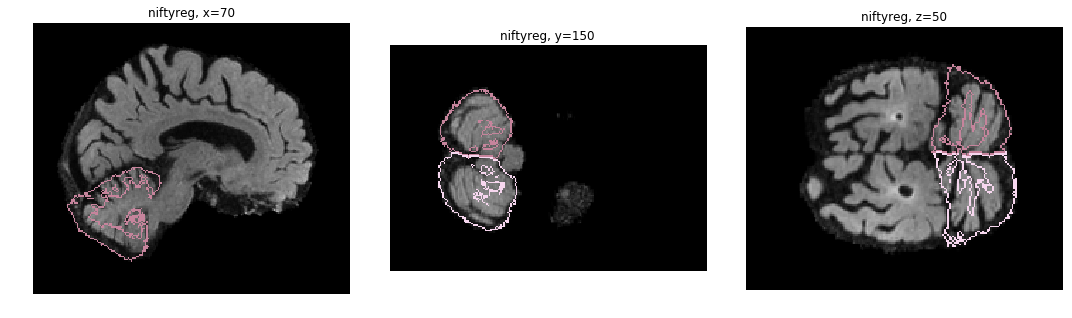

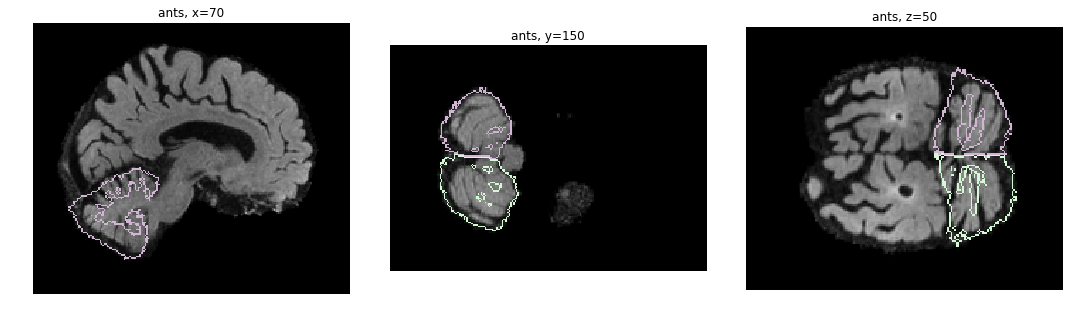

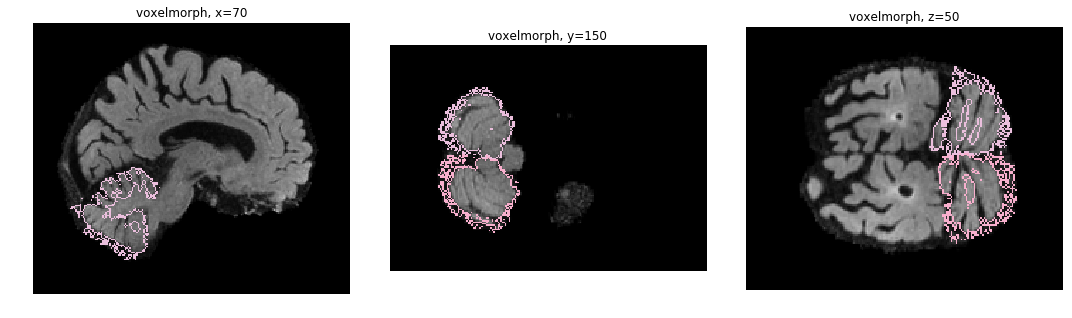

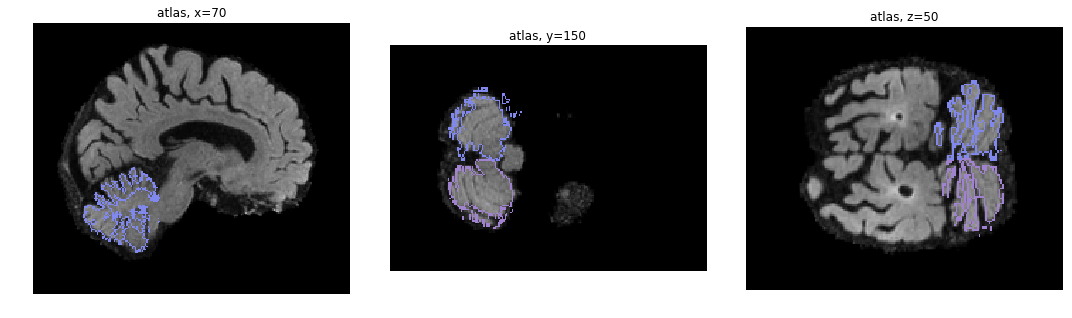

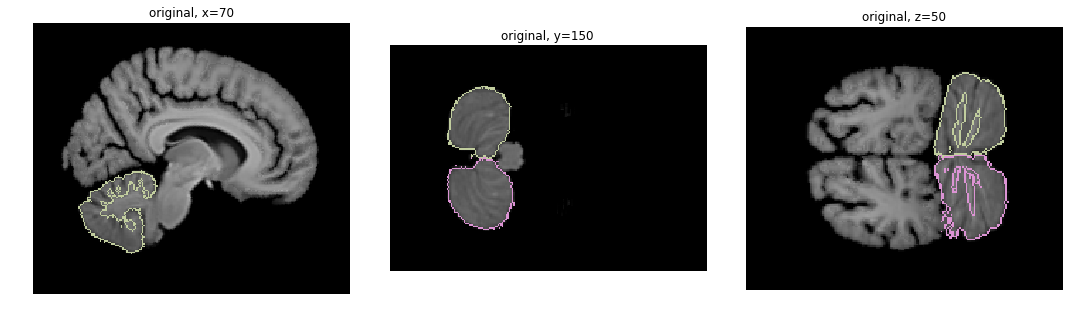

In [54]:
visualize_seg_contour(atlas, nifty_seg, title='niftyreg', region_numbers=reg_to_num_list['Cerebellum-Cortex'], slice_idx=[70, 150, 50])
visualize_seg_contour(atlas, ants_seg, title='ants', region_numbers=reg_to_num_list['Cerebellum-Cortex'], slice_idx=[70, 150, 50])
visualize_seg_contour(atlas, vm_seg, title='voxelmorph', region_numbers=reg_to_num_list['Cerebellum-Cortex'], slice_idx=[70, 150, 50])

visualize_seg_contour(atlas, atlas_seg, title='atlas', region_numbers=reg_to_num_list['Cerebellum-Cortex'], slice_idx=[70, 150, 50])
visualize_seg_contour(original, original_seg, title='original', region_numbers=reg_to_num_list['Cerebellum-Cortex'], slice_idx=[70, 150, 50])